In [20]:
# Research Question: How does physical activity level impact students' confidence in coping with stress and their academic performance?

# Survey was given to first-year incoming freshmen students at Truman State University. In this research, I attempt to answer the above question. 

In [162]:
# Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Load data

data = pd.read_csv("PreTest_ReadyForRStudio.csv")

In [74]:
# Basic full data observations

data.describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

In [76]:
# Basic data observations honed in on the Physical_Activity_Scress variable. This is an essential variable for this research.
# Note: The Physical_Activity_Stress variable was an answer to the following question on a scale from 1-4: 
# I use physical activity as a coping mechanism to help deal with stress

data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

In [62]:
# What is our n?

data["Over_18"].count() 

# n = 1074. 
# Note: respondents must answer this question to remain in the data set.

1074

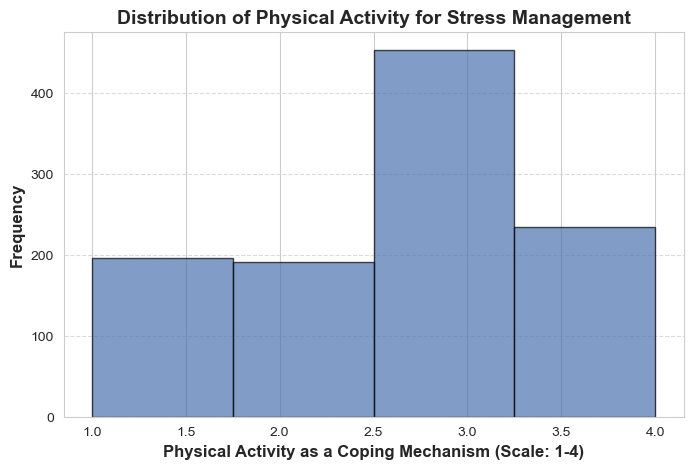

In [102]:
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)

# Add labels and title with enhanced formatting
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

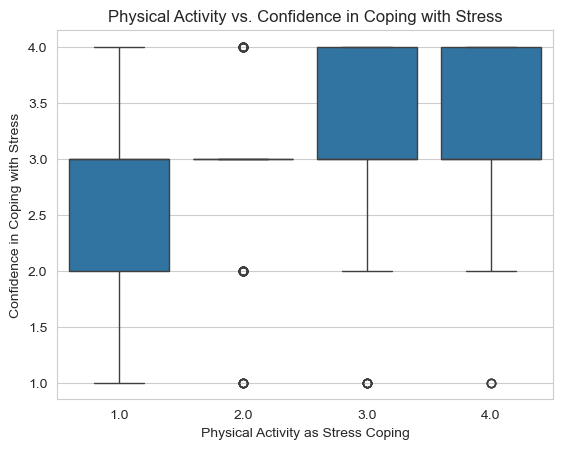

In [121]:
sns.boxplot(x = 'Physical_Activity_Stress', y = 'Stress_Coping', data = data)
plt.xlabel("Physical Activity as Stress Coping")
plt.ylabel("Confidence in Coping with Stress")
plt.title("Physical Activity vs. Confidence in Coping with Stress")
plt.show()

# The plot suggests that students who rely more on physical activity for stress management tend to report higher confidence in coping with stress.
# The median stress-coping confidence appears higher for those who rate physical activity as an effective coping mechanism.
# There are some outliers, particularly for lower values of Physical_Activity_Stress, indicating variability in responses.

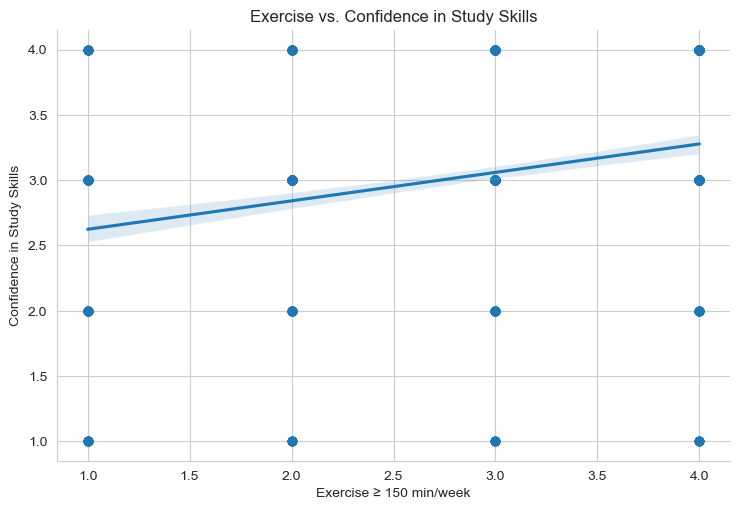

In [125]:
sns.lmplot(x = "Exercise_150_Min", y = "Study_Skills", data = data, aspect = 1.5)
plt.xlabel("Exercise ≥ 150 min/week")
plt.ylabel("Confidence in Study Skills")
plt.title("Exercise vs. Confidence in Study Skills")
plt.show()

# The regression line shows a positive correlation, meaning students who exercise more tend to have greater confidence in their study skills.
# Although the correlation is not very strong, the trend suggests that regular exercise could be linked to improved academic confidence.

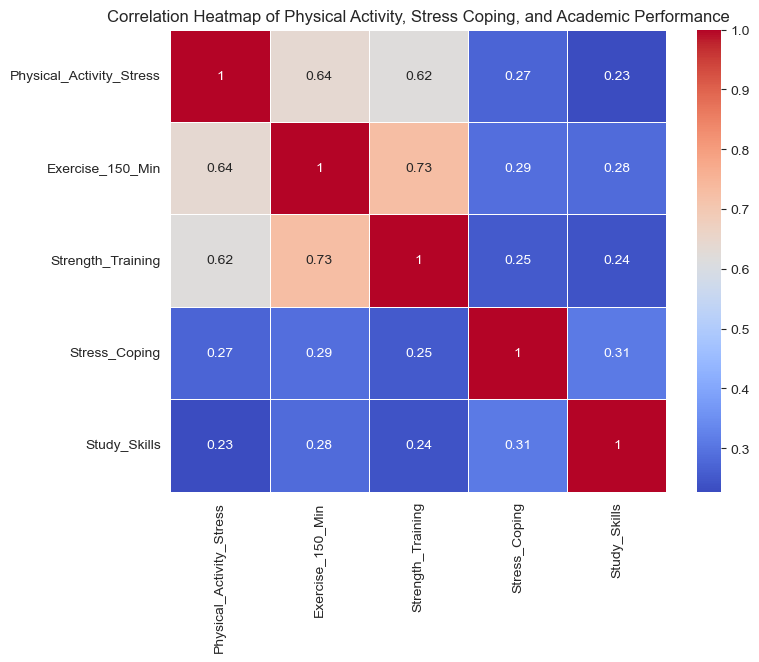

In [139]:
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity, Stress Coping, and Academic Performance")
plt.show()

# Physical_Activity_Stress, Exercise_150_Min, and Strength_Training are positively correlated (≥0.6), which is expected since these variables all relate to physical activity.
# Stress_Coping has a moderate positive correlation (~0.27-0.31) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.
# Study_Skills has a weaker correlation (~0.23-0.28) with physical activity, but it still suggests a potential positive effect of exercise on academic confidence.

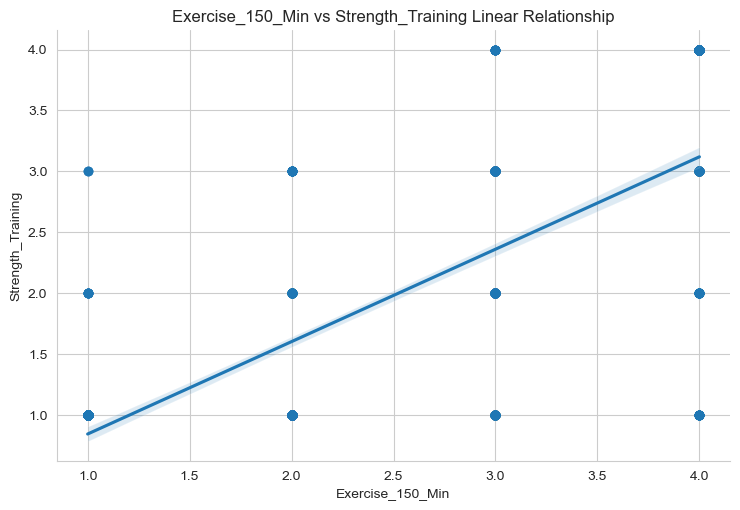

In [129]:
# Before, we had used Exercise_150_Min and Study_Skills, with a linear correlation of 0.24. 
# Now let's try something with a stronger linear coefficient, say Exercise_150_Min and Strength_Training (coeff ~ 0.73)

sns.lmplot(x = 'Exercise_150_Min', y = 'Strength_Training', data = data, aspect = 1.5)
plt.xlabel("Exercise_150_Min")
plt.ylabel("Strength_Training")
plt.title("Exercise_150_Min vs Strength_Training Linear Relationship")
plt.show()

# Now we have a stronger linear relationship. This shows that there is a significant relationship between exercising over 150 minutes and 
# engaging in strength training. 


In [158]:
X = data[['Physical_Activity_Stress', 'Stress_Coping']]  # Features
y = data['Intellectual_Score']  # Target variable (attempting to approximate academic performance)

data[['Physical_Activity_Stress', 'Stress_Coping', 'Intellectual_Score']].isna().sum() # Checking for NA values

# There are no NA values in the columns we are going to train our model(s) with.

Physical_Activity_Stress    0
Stress_Coping               0
Intellectual_Score          0
dtype: int64

In [164]:
# Splitting testing and training data, also using feature scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)